In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("hmnist_28_28_RGB.csv")
data.head()


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [4]:
data.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [5]:
data["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [6]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [7]:
Label = data["label"]
Data = data.drop(columns=["label"]) 

<Axes: ylabel='count'>

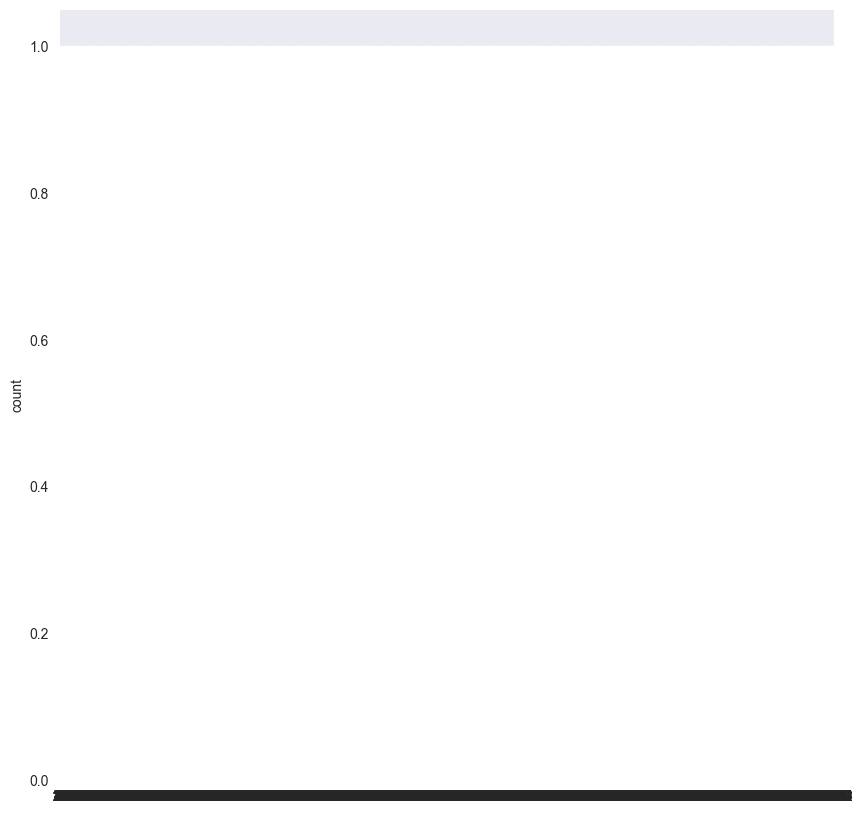

In [22]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label)

In [8]:
oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :',Data.shape)

Shape of Data : (46935, 28, 28, 3)


In [9]:
Label = np.array(Label)

In [10]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


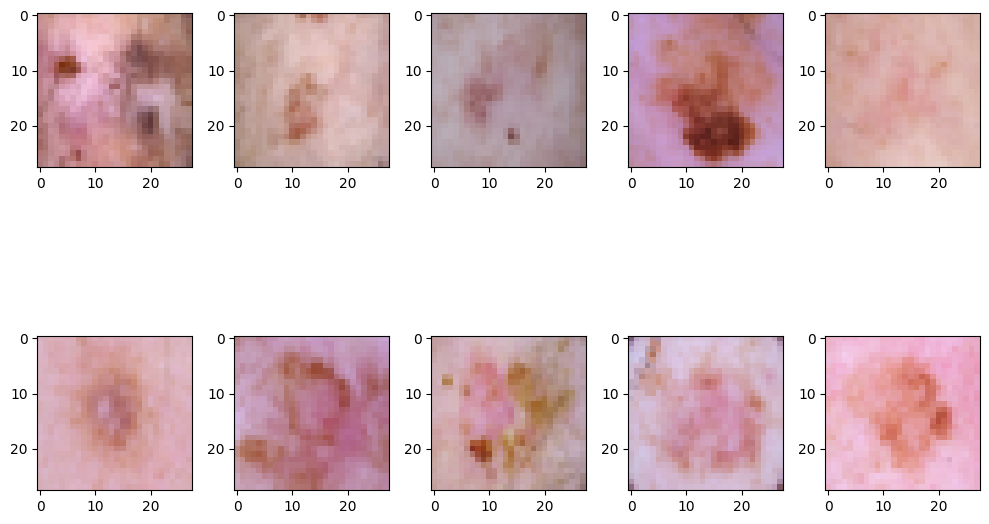

In [12]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(fill_mode='nearest'
                             ,rotation_range=20
                             ,zoom_range = 0.14
                             ,shear_range = 0.1
                             ,horizontal_flip = True)
# testgen = ImageDataGenerator(rescale=(1./255))

In [15]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [16]:
def My_Model():
    # Feature extraction phase
    input_ = keras.layers.Input(shape=[28, 28, 3])

    # First convolution block
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_)
    x = keras.layers.MaxPooling2D()(x)
    x = keras.layers.BatchNormalization()(x)

    # Second convolution block
    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = keras.layers.MaxPooling2D()(x)
    x = keras.layers.BatchNormalization()(x)

    # Third convolution block
    x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = keras.layers.MaxPooling2D()(x)
    x = keras.layers.BatchNormalization()(x)

    # Fourth convolution block with dilation rate 2
    x = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', dilation_rate=2)(x)
    x = keras.layers.MaxPooling2D()(x)
    x = keras.layers.BatchNormalization()(x)

    # Flattening and fully connected layers
    flatten = keras.layers.Flatten()(x)
    x = keras.layers.Dropout(rate=0.2)(flatten)
    x = keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L1L2())(x)
    x = keras.layers.BatchNormalization()(x)

    # Classification phase
    # First fully connected layer
    x = keras.layers.Dense(units=4096, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.5)(x)  # Dropout layer after the first fully connected layer

    # Second fully connected layer
    x = keras.layers.Dense(units=4096, activation='relu')(x)
    x = keras.layers.Dropout(rate=0.5)(x)  # Dropout layer after the second fully connected layer

    # Output layer with softmax activation for classification
    output = keras.layers.Dense(units=7, activation='softmax')(x)  

    model = keras.models.Model(inputs=input_, outputs=output)
    return model


In [17]:
model = My_Model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 18,221,031 (69.51 MB)

 Trainable params: 18,219,111 (69.50 MB)

 Non-trainable params: 1,920 (7.50 KB)

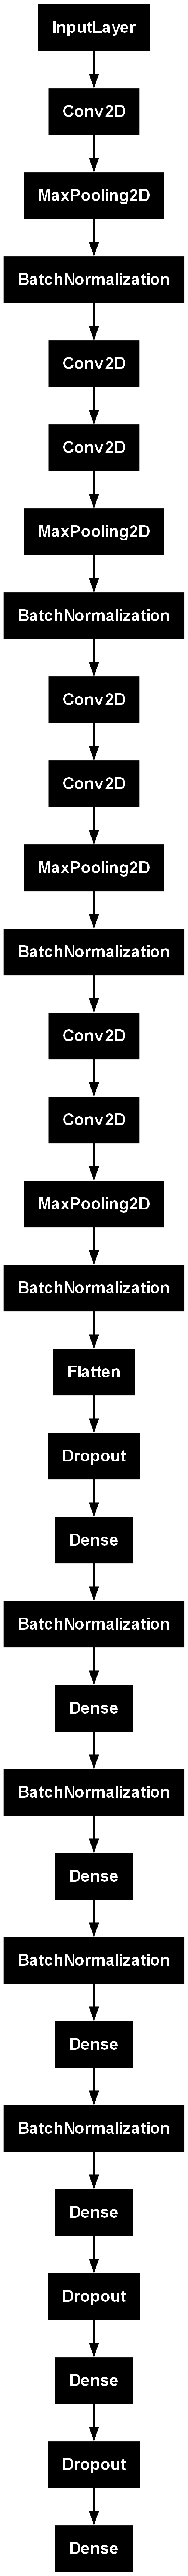

In [29]:
keras.utils.plot_model(model)

In [18]:
model.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=25,
                    callbacks=[learning_rate_reduction],
                    validation_data=(X_test, y_test))


Epoch 1/25


c:\Python 3.10.11\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/276 ━━━━━━━━━━━━━━━━━━━━ 110s 376ms/step - accuracy: 0.4932 - loss: 1.3196 - val_accuracy: 0.6431 - val_loss: 0.9883 - learning_rate: 0.0010
Epoch 2/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 104s 377ms/step - accuracy: 0.7263 - loss: 0.7482 - val_accuracy: 0.7472 - val_loss: 0.7058 - learning_rate: 0.0010
Epoch 3/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 104s 375ms/step - accuracy: 0.7828 - loss: 0.5878 - val_accuracy: 0.7565 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 4/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 103s 373ms/step - accuracy: 0.8089 - loss: 0.5057 - val_accuracy: 0.7972 - val_loss: 0.5456 - learning_rate: 0.0010
Epoch 5/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 103s 373ms/step - accuracy: 0.8404 - loss: 0.4351 - val_accuracy: 0.8208 - val_loss: 0.4756 - learning_rate: 0.0010
Epoch 6/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 105s 381ms/step - accuracy: 0.8622 - loss: 0.3829 - val_accuracy: 0.8756 - val_loss: 0.3343 - learning_rate: 0.0010
Epoch 7/25
276/276 ━━━━━━━━━━━━━━━━━━━━ 104s 376ms/step - accuracy: 0.8731 

In [19]:
model.evaluate(X_test , y_test)

367/367 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9752 - loss: 0.0962


[0.09069269895553589, 0.975967288017273]

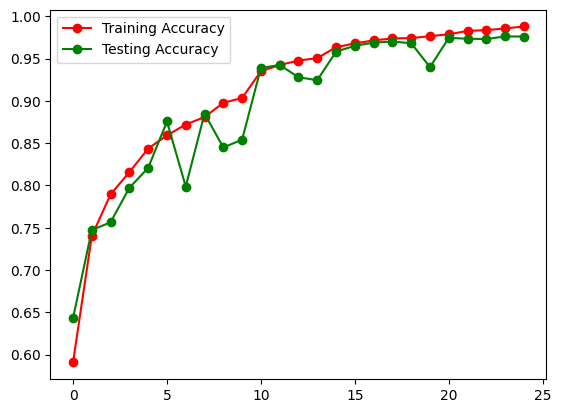

In [20]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

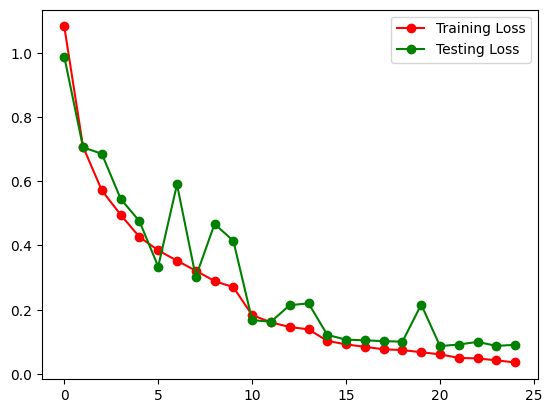

In [21]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [22]:
y_pred  = model.predict(X_test).round()
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step
                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       0.99      0.99      0.99      1667
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      1.00      1689
                     ('bkl', 'benign keratosis-like lesions')       0.97      0.98      0.98      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.99      0.85      0.92      1663
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.91      1.00      0.95      1755

                                                    micro avg       0.98      0.98      0.98     11734
                            

c:\Python 3.10.11\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

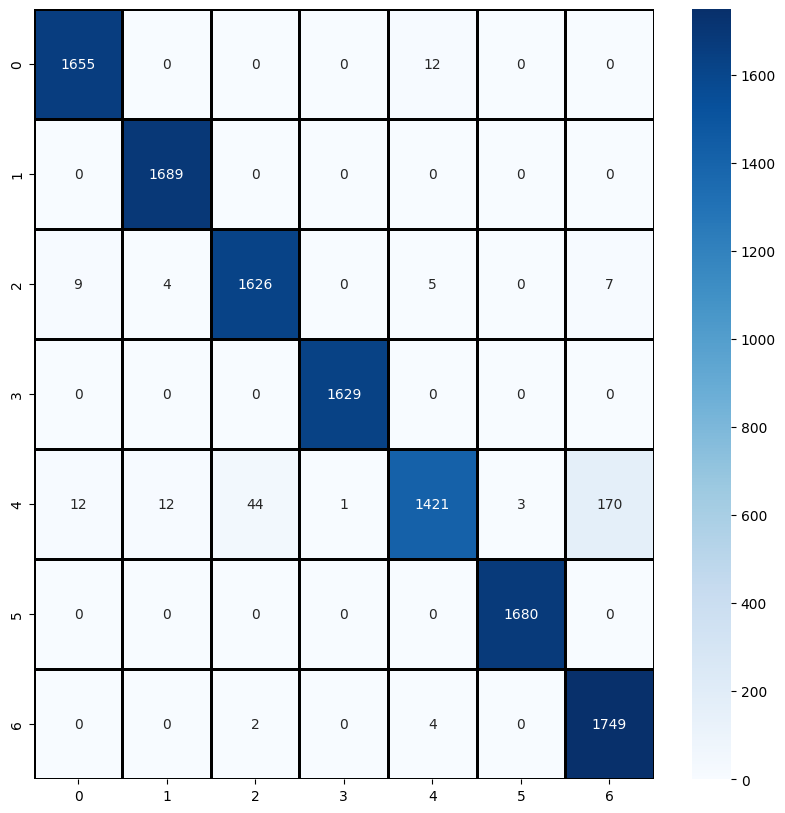

In [23]:
cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(7)] , columns = [i for i in range(7)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

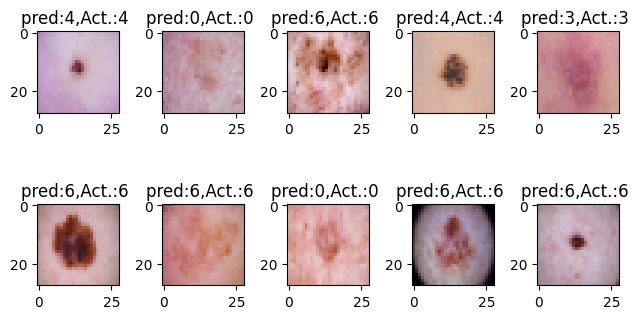

In [31]:
correct = np.nonzero(y_pred == y_test)[0]

k = 0 
for c in correct[:10]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(28,28,3) , interpolation='none')
            plt.title(f"pred:{y_pred[k].argmax(axis = 0)},Act.:{y_test[k].argmax(axis = 0)} ")
            plt.tight_layout()
            k += 1

In [25]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1101/1101 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9909 - loss: 0.0289
367/367 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9752 - loss: 0.0962
Train Loss:  0.03279997035861015
Train Accuracy:  0.9901423454284668
--------------------
Test Loss:  0.09069269895553589
Test Accuracy:  0.975967288017273


In [26]:
# Save the trained model
model.save('skin_cancer_model_final.h5')



In [1]:
## predict our own image

from PIL import Image
import numpy as np
import tensorflow as tf

# Define the mapping of class indices to labels and descriptions
classes = {
    4: ('nv', 'melanocytic nevi'),
    6: ('mel', 'melanoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    1: ('bcc', 'basal cell carcinoma'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    3: ('df', 'dermatofibroma')
}

# Load the trained model
loaded_model = tf.keras.models.load_model('skin_cancer_model_final.h5')


# Load and preprocess the new image
# image_path = r'D:\Programming_Back-Up\Development_Projects\Capston_Project\uploads\melanoma_1_Asymmetry.jpg'
image_path = 'dermatofibroma.webp'
new_image = Image.open(image_path)
new_image = new_image.resize((28, 28))  # Resize the image to match the input size of the model
new_image = np.array(new_image)  # Convert image to numpy array


# Make predictions
predictions = loaded_model.predict(np.expand_dims(new_image, axis=0))
predicted_class = np.argmax(predictions)

# Get the label and description for the predicted class
predicted_label, predicted_description = classes[predicted_class]

print("Predicted class:", predicted_class)
print("Predicted label:", predicted_label)
print("Predicted description:", predicted_description)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
Predicted class: 1
Predicted label: bcc
Predicted description: basal cell carcinoma
